In [31]:
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Activation , LSTM , Dropout , AveragePooling3D
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [37]:
df=pd.read_csv('data.csv')
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [42]:
X = df.values[:, 1:-1].astype(np.float32)
y = df.values[:, -1].astype(int) - 1      

Y = to_categorical(y, num_classes=5)


X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.20, random_state=1
)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
# X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))


print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

X_train_scaled shape: (9200, 178)
X_test_scaled shape: (2300, 178)


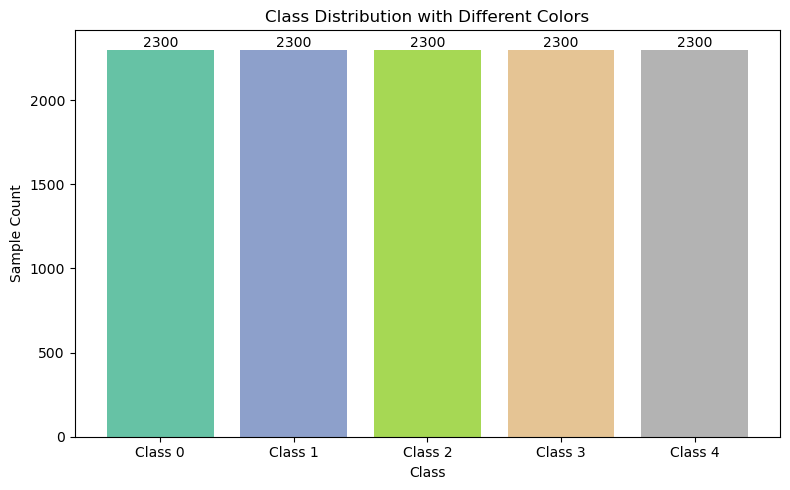

In [43]:
unique, counts = np.unique(y, return_counts=True)

colors = plt.cm.Set2(np.linspace(0, 1, len(unique)))  
plt.figure(figsize=(8, 5))
bars = plt.bar(unique, counts, tick_label=[f'Class {i}' for i in unique], color=colors)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{int(height)}', ha='center', va='bottom')

plt.title("Class Distribution with Different Colors")
plt.xlabel("Class")
plt.ylabel("Sample Count")
plt.tight_layout()
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Conv1D, Flatten, Reshape, BatchNormalization, Activation

inputs = Input(shape=(178,))

x = Dense(128, activation='relu')(inputs)
# x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)


x = Reshape((64, 1))(x)


x = Conv1D(64, kernel_size=3, activation='relu', padding='same')(x)
x = Dropout(0.3)(x)
x = Conv1D(32, kernel_size=3, activation='relu', padding='same')(x)
x = Flatten()(x)


x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(5, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)
model.summary()


Model: "functional_102"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)     │ (None, 178)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 128)            │        22,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_6 (Reshape)             │ (None, 64, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_11 (Conv1D)              │ (None, 64, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 64, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_12 (Conv1D)              │ (None, 64, 32)         │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 169,317 (661.39 KB)

 Trainable params: 169,189 (660.89 KB)

 Non-trainable params: 128 (512.00 B)

In [82]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    metrics=['accuracy']
)


In [83]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(
    X_train_scaled, Y_train,
    validation_data=(X_test_scaled, Y_test),
    epochs=50,
    batch_size=10,
    callbacks=[early_stop],
    verbose=2
)


Epoch 1/50


920/920 - 3s - 3ms/step - accuracy: 0.4633 - loss: 1.2849 - val_accuracy: 0.5222 - val_loss: 1.1927
Epoch 2/50
920/920 - 2s - 2ms/step - accuracy: 0.5522 - loss: 1.1427 - val_accuracy: 0.6283 - val_loss: 1.0688
Epoch 3/50
920/920 - 2s - 2ms/step - accuracy: 0.5824 - loss: 1.0813 - val_accuracy: 0.6304 - val_loss: 1.0226
Epoch 4/50
920/920 - 2s - 2ms/step - accuracy: 0.6026 - loss: 1.0495 - val_accuracy: 0.6413 - val_loss: 0.9933
Epoch 5/50
920/920 - 2s - 2ms/step - accuracy: 0.6216 - loss: 1.0168 - val_accuracy: 0.6374 - val_loss: 0.9769
Epoch 6/50
920/920 - 2s - 2ms/step - accuracy: 0.6285 - loss: 1.0095 - val_accuracy: 0.6396 - val_loss: 0.9719
Epoch 7/50
920/920 - 2s - 2ms/step - accuracy: 0.6263 - loss: 0.9987 - val_accuracy: 0.6687 - val_loss: 0.9476
Epoch 8/50
920/920 - 2s - 2ms/step - accuracy: 0.6355 - loss: 0.9885 - val_accuracy: 0.6574 - val_loss: 0.9614
Epoch 9/50
920/920 - 2s - 2ms/step - accuracy: 0.6489 - loss: 0.9720 - val_accuracy: 0.6561 - val_loss: 0.9541
Epoch 10/50


In [84]:
model.save("anncnn.h5")
print("Model saved as anncnn.h5")

Model saved as anncnn.h5


In [85]:
from keras.models import load_model

model = load_model("anncnn.h5")

In [86]:
test_loss, test_acc = model.evaluate(X_test_scaled, Y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")


y_pred_probs = model.predict(X_test_scaled)


y_pred_classes = np.argmax(y_pred_probs, axis=1)

y_true_classes = np.argmax(Y_test, axis=1)


Test Accuracy: 0.6730
Test Loss: 0.9196
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


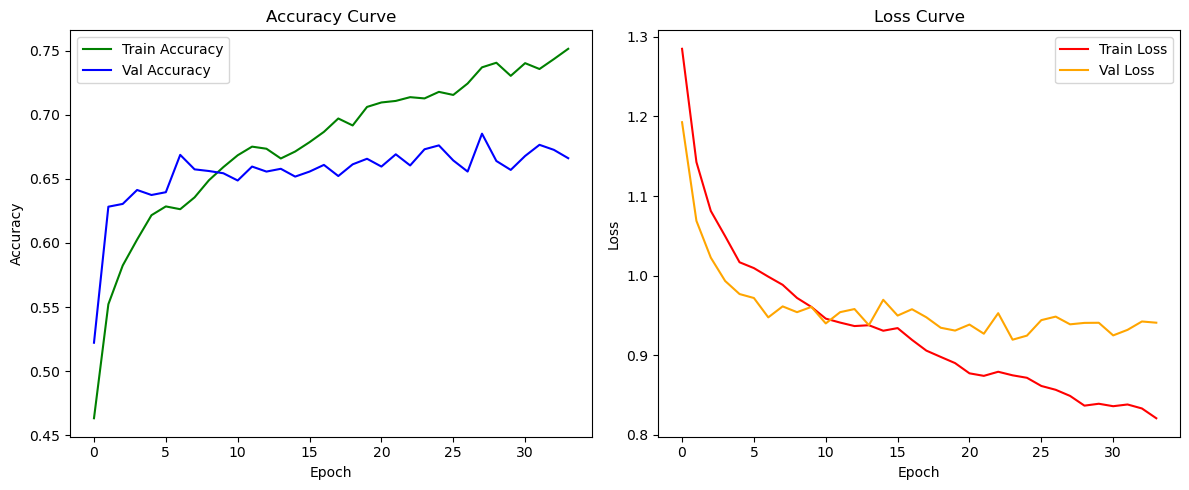

In [87]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='green')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', color='blue')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve")
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='red')
plt.plot(history.history['val_loss'], label='Val Loss', color='orange')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()

plt.tight_layout()
plt.show()


In [88]:
from sklearn.metrics import classification_report

print("\nClassification Report:\n")
print(classification_report(y_true_classes, y_pred_classes))


Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       454
           1       0.56      0.23      0.32       477
           2       0.50      0.74      0.59       472
           3       0.79      0.74      0.76       422
           4       0.63      0.75      0.68       475

    accuracy                           0.67      2300
   macro avg       0.68      0.68      0.66      2300
weighted avg       0.68      0.67      0.66      2300



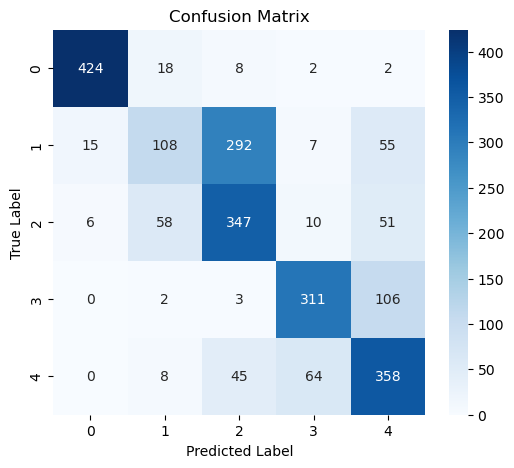

In [89]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [90]:
comparison_df = pd.DataFrame({
    'y_true': y_true_classes,
    'y_pred': y_pred_classes
})
print(comparison_df.head(20)) 

    y_true  y_pred
0        1       4
1        0       0
2        0       0
3        0       0
4        2       2
5        1       4
6        2       2
7        0       0
8        3       3
9        0       0
10       2       2
11       0       0
12       1       2
13       3       3
14       1       1
15       0       0
16       2       1
17       2       2
18       1       1
19       4       4
